<a href="https://colab.research.google.com/github/ashkan-tabibian/ML_Colab/blob/main/regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student-mat.csv to student-mat.csv
User uploaded file "student-mat.csv" with length 56993 bytes


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle


data = pd.read_csv("student-mat.csv", sep=";")
print (data.head())
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print (data.head())


  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [ ]:
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) # acc stands for accuracy 
print(acc)

print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

#saving
with open("studentmodel.pickle", "wb") as f:
  pickle.dump(linear, f)

pickle_in= open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)




0.777803481591171
Coefficient: 
 [ 0.1518905   0.96580532 -0.17196787 -0.26142434  0.03169386]
Intercept: 
 -1.2914137942864006


In [ ]:
predictions = linear.predict(x_test)
for x in range (len(predictions)):
    print(predictions[x], x_test[x], y_test[x])


9.41988717425496 [ 9 10  2  0  2] 9
4.894822698885286 [8 6 2 2 2] 5
7.318416001965408 [8 8 2 0 2] 8
10.409203048472062 [11 11  3  0  0] 10
11.292142181314642 [12 11  1  1 16] 12
11.931747997272067 [11 12  2  0 10] 13
10.547016834972531 [10 11  2  0  2] 11
9.249072953690398 [10 10  4  0  6] 11
15.208323626988404 [15 15  2  0  2] 16
13.171252830094343 [14 13  2  0  4] 13
13.461854765740402 [14 13  1  0  6] 13
13.04390329534452 [10 13  1  0 12] 12
10.940980907013808 [13 11  2  0  0] 10
9.63707569879604 [10 10  2  0  4] 10
12.053136205086258 [12 12  1  0  2] 11
8.075568988996308 [7 9 2 0 0] 8
13.919392781415757 [14 14  3  0  4] 14
4.054453937073056 [ 6  5  1  3 16] 5
10.69980498411812 [11 11  2  0  2] 11
10.948947513764015 [10  9  2  0 75] 9
9.63707569879604 [10 10  2  0  4] 10
9.557700960755431 [ 8 10  1  0  4] 10
13.073852020634758 [14 13  3  0  8] 14
15.208323626988404 [15 15  2  0  2] 14
8.533933436433076 [10  9  2  0  0] 0
9.810010209555518 [11 10  2  1 12] 10
6.803890153871356 [ 7  7

In [ ]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE

predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)


#saving
with open("studentmodel.pickle", "wb") as f:
  pickle.dump(linear, f)

pickle_in= open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)




Accuracy: 0.7629524912046164
Accuracy: 0.742998243440075
Accuracy: 0.8547907670856943
Accuracy: 0.7753501235647384
Accuracy: 0.894416612031236
Accuracy: 0.9095313366375031
Accuracy: 0.8547988181645838
Accuracy: 0.7944953880312038
Accuracy: 0.9017278312597243
Accuracy: 0.9074510783464628
Accuracy: 0.703584202820154
Accuracy: 0.8253106026376779
Accuracy: 0.8494256561325741
Accuracy: 0.8504376352190556
Accuracy: 0.7588772185170376
Accuracy: 0.8081050615927677
Accuracy: 0.7849377559990066
Accuracy: 0.5872393642827054
Accuracy: 0.9031265137562425
Accuracy: 0.9023684718072198
Accuracy: 0.8779525008204841
Accuracy: 0.7352083275014099
Accuracy: 0.5998291054139666
Accuracy: 0.5994474501084571
Accuracy: 0.7706415884016611
Accuracy: 0.7083384462238252
Accuracy: 0.8002679355290402
Accuracy: 0.7381605638994126
Accuracy: 0.7219086333955111
Accuracy: 0.8240141763567528


No handles with labels found to put in legend.


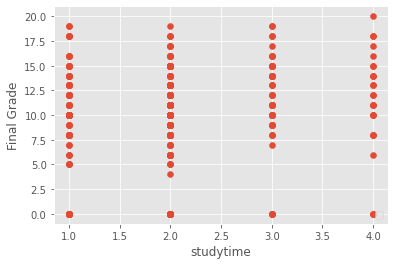

In [ ]:
#plot

plot = "studytime" # Change this to G1, G2, studytime or absences to see other graphs
style.use("ggplot")
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()